In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
telugu_df=pd.read_csv("/content/drive/MyDrive/input/telugu_books.csv")
train_df=pd.read_csv("/content/drive/MyDrive/input/train_telugu_news.csv")
test_df=pd.read_csv("/content/drive/MyDrive/input/test_telugu_news.csv")
print(telugu_df.info())
print(test_df.info(10))
print(train_df.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SNo     25793 non-null  int64 
 1   text    25774 non-null  object
dtypes: int64(1), object(1)
memory usage: 403.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SNo      4329 non-null   int64 
 1   date     4329 non-null   object
 2   heading  4329 non-null   object
 3   body     4329 non-null   object
 4   topic    4329 non-null   object
dtypes: int64(1), object(4)
memory usage: 169.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17312 entries, 0 to 17311
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SNo      17312 non-null  int64 
 1   date     17312 non-null  object
 2   heading 

In [8]:
train_df["text"]=train_df['heading']+train_df['body']
test_df['text']=test_df['heading']+test_df['body']

concat_df=pd.concat([train_df['text'],test_df['text']])
concat_df1=pd.DataFrame(concat_df,columns=['text'])
result_df=pd.concat([telugu_df['text'],concat_df1['text']])


In [9]:
result_df1=pd.DataFrame(result_df,columns=['text'])
result_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47434 entries, 0 to 4328
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47414 non-null  object
dtypes: object(1)
memory usage: 741.2+ KB


In [10]:
import re
import re
def clean_telugu_text_vocab(str_element):
    a=str(str_element)
    
    a=a.replace("\r",'')
    a=a.replace("\n",'')
    #a=a.replace(u'xao','')
    a=a.replace("  ","")
    a=a.replace('"','')
    a=a.replace(u'xao',u'')
  
    a=a.split()
    
    a=' '.join(map(str, a))
    return a
result_df1['text2']=result_df1['text'].apply(clean_telugu_text_vocab)
def clean_telugu_text(str_element):
    a=str(str_element)
    
    a=a.replace("\r",'')
    a=a.replace("\n",'')
    #a=a.replace(u'xao','')
    a=a.replace("  ","")
    a=a.replace('"','')
    a=a.replace(u'xao',u'')
  
    a=a.split()
    
    a=' '.join(map(str, a))
    return a.split()
result_df1['text1']=result_df1['text'].apply(clean_telugu_text)

In [11]:
result_df1['text1'].head()

0    [సుశీలమ్మ, కళ్ళలో, భయం, పారాడింది., అనాధ, బిడ్...
1    [8., దశరథుని, మరణము, పశ్చాత్తాపముతో, కుమిలిపోవ...
2    [ఎలా, వుంది, ఫ్రెండ్....., టప్, టపా, టప్, దూరం...
3    [అది, ఊరుకున్నా, మీరు, వుండలేరు., మీరిద్దరే, వ...
4    [అయన, అలా, వెళ్ళిపోగానే, గుమ్మం, పక్కనుంచి, రా...
Name: text1, dtype: object

In [12]:
from gensim.test.utils import get_tmpfile
from gensim.models import Word2Vec
common_texts=list(result_df1['text1'])
path = get_tmpfile("word2vec.model")
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

In [13]:
print(model.most_similar("వుండలేరు"))
print()
print(model.most_similar("కళ్ళలో"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('పుండరీకాక్షయ్య.నాకు', 0.8447502851486206), ('ఓడిపోతామని', 0.8431220054626465), ('కాశీబాంబు.', 0.8403126001358032), ('బాగుపడతారో', 0.835895299911499), ('దశరధ్.', 0.8352984189987183), ('ముగ్గురివల్లా', 0.834456741809845), ('పకీరయ్య.ఆడదాన్నిలా', 0.8337625861167908), ('పెట్టుకుంటున్నావ్?', 0.8276427984237671), ('సరుసు.', 0.8275633454322815), ('ఆనందం.చిత్తం!మనం', 0.8258363008499146)]

[('కళ్ళల్లో', 0.9660543203353882), ('ముఖంలో', 0.8838231563568115), ('మోహంలో', 0.8674967288970947), ('కళ్లలో', 0.8657441139221191), ('కళ్లల్లో', 0.8511731028556824), ('కళ్ళలోని', 0.8478720188140869), ('గొంతులో', 0.8442344665527344), ('మొఖంలో', 0.8399710655212402), ('నేత్రాంచలాల్లో', 0.8395174145698547), ('ముఖంలోని', 0.8327131271362305)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
print(model.most_similar("దూరం"))
print()
print(model.most_similar("భయం"))
print()
print(model.most_similar("భారీ"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('దూరంగా', 0.6880889534950256), ('తప్పించుకుని', 0.6785092353820801), ('అంతదూరం', 0.6591163873672485), ('జంకి,', 0.6559892892837524), ('కొట్టుంటే', 0.6512808799743652), ('తప్పించుకు', 0.6220542788505554), ('ఎత్తుకు', 0.6183663606643677), ('బయటపడి', 0.6124967932701111), ('ఉంటున్నా..', 0.6114917397499084), ('ఎత్తుమీద', 0.6099779605865479)]

[('అసహ్యం', 0.8082866668701172), ('జాలి', 0.7765970230102539), ('ఆశ్చర్యం', 0.7681636810302734), ('చిరాకు', 0.7651983499526978), ('దిగులు', 0.7581684589385986), ('ఆవేశం', 0.7566068172454834), ('విసుగు', 0.752895176410675), ('బాధ', 0.7460242509841919), ('కుతూహలం', 0.7438070774078369), ('భయం,', 0.7376872897148132)]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


[('భారీగా', 0.8157057762145996), ('డిమాండ్\u200cభారీ', 0.7618753910064697), ('ఎత్తున', 0.7586169242858887), ('అత్యధిక', 0.7573887705802917), ('కొనుగోళ్లుజీఎస్టీతో', 0.7496935725212097), ('సరికొత్త', 0.741043210029602), ('బ్రహ్మాండమైన', 0.7404294610023499), ('కుసాలుగుడా', 0.7229392528533936), ('తొలిసారిగా', 0.7219505310058594), ('కోట్లుభారీ', 0.7201932072639465)]


In [15]:
#model.save("/content/Gdrive/My Drive/Kaggle_prjs/Telugu_NLP/W2V_TE")
#model.wv.save_word2vec_format("/kaggle/working/Word2Vec_TE1.txt",binary=False)

So far trained the corpus on books.csv,now would like to use the words in train csv to generate the sequences

In [16]:
#train_df=pd.read_csv("/content/Gdrive/My Drive/Kaggle_prjs/Telugu_NLP/train_telugu_news.csv")

train_df.head()

,SNo,date,heading,body,topic,text
0,414,11-05-2017 00:39:13,ఐడిబిఐపై ఆర్‌బిఐ నజర్‌,భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ ...,business,ఐడిబిఐపై ఆర్‌బిఐ నజర్‌భారీ ఎత్తున మొండిబకాయిలు...
1,2668,12-06-2017 00:40:32,బ్యాంకింగ్‌ చీఫ్‌లతో నేడు జైట్లీ భేటీ,న్యూఢిల్లీ : ఆర్థిక మంత్రి అరుణ్‌ జైట్లీ సోమవా...,business,బ్యాంకింగ్‌ చీఫ్‌లతో నేడు జైట్లీ భేటీన్యూఢిల్ల...
2,19923,19-01-2017 19:51:31,కీలక వికెట్ తీసిన జడేజా..,కటక్: ఇంగ్లండ్‌తో జరుగుతున్న సెకండ్ వన్డే మ్యా...,sports,కీలక వికెట్ తీసిన జడేజా..కటక్: ఇంగ్లండ్‌తో జరు...
3,15762,23-11-2017 17:29:04,మరో రెచ్చగొట్టే చర్యకు దిగిన పాకిస్థాన్,\nఇస్లామాబాద్ : పాకిస్థాన్ అంతర్జాతీయ ఉగ్రవాది...,nation,మరో రెచ్చగొట్టే చర్యకు దిగిన పాకిస్థాన్\nఇస్లా...
4,8624,03-04-2017 15:48:23,గోవాలో కొడుకుతో కలిసి అల్లు అర్జున్ స్విమ్మింగ్!,స్టార్‌ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటి...,entertainment,గోవాలో కొడుకుతో కలిసి అల్లు అర్జున్ స్విమ్మింగ...


In [17]:
test_df.head()

,SNo,date,heading,body,topic,text
0,7771,19-05-2017 13:44:10,కేశవ,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,entertainment,కేశవహీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన న...
1,9591,01-08-2017 13:58:24,డబ్బుల కోసం ప్రాణాల మీదకు తెచ్చుకుంటారా.. హీరో...,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment,డబ్బుల కోసం ప్రాణాల మీదకు తెచ్చుకుంటారా.. హీరో...
2,12622,05-04-2017 00:31:58,దక్షిణాదిన బీజేపీ పప్పులుడకవ్‌,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation,దక్షిణాదిన బీజేపీ పప్పులుడకవ్‌ దక్షిణ భారతాన్న...
3,16401,30-08-2017 03:34:37,పీఎస్‌ఎల్వీ-సీ39కి గ్రీన్‌సిగ్నల్‌,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation,పీఎస్‌ఎల్వీ-సీ39కి గ్రీన్‌సిగ్నల్‌ నేటి మధ్యాహ...
4,10422,10-04-2017 09:00:48,ఏయ్ జయప్రకాష్ అనే కేక వినిపించింది.. వెనక్కి త...,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,entertainment,ఏయ్ జయప్రకాష్ అనే కేక వినిపించింది.. వెనక్కి త...


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17312 entries, 0 to 17311
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SNo      17312 non-null  int64 
 1   date     17312 non-null  object
 2   heading  17311 non-null  object
 3   body     17312 non-null  object
 4   topic    17312 non-null  object
 5   text     17311 non-null  object
dtypes: int64(1), object(5)
memory usage: 811.6+ KB


In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_df['target']=le.fit_transform(train_df['topic'])
print(train_df['target'].unique())
print(train_df['topic'].unique())

[0 4 3 2 1]
['business' 'sports' 'nation' 'entertainment' 'editorial']


In [20]:
test_df['target']=le.fit_transform(test_df['topic'])
print(test_df['target'].unique())
print(test_df['topic'].unique())

[2 3 0 1 4]
['entertainment' 'nation' 'business' 'editorial' 'sports']


nation           6628
entertainment    5145
business         2572
sports           1908
editorial        1059
Name: topic, dtype: int64


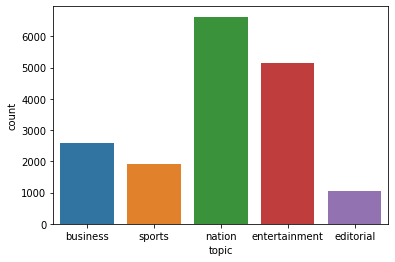

In [21]:
print(train_df["topic"].value_counts())
sns.countplot(x='topic',data=train_df)


In [22]:
max_len = 500
train_df['text1']=train_df['body'].apply(clean_telugu_text)
train_df['heading1']=train_df['heading'].apply(clean_telugu_text)
train_df["concat_text"]=train_df['heading1']+train_df['text1']
train_df["concat_text"].head()


0    [ఐడిబిఐపై, ఆర్‌బిఐ, నజర్‌, భారీ, ఎత్తున, మొండి...
1    [బ్యాంకింగ్‌, చీఫ్‌లతో, నేడు, జైట్లీ, భేటీ, న్...
2    [కీలక, వికెట్, తీసిన, జడేజా.., కటక్:, ఇంగ్లండ్...
3    [మరో, రెచ్చగొట్టే, చర్యకు, దిగిన, పాకిస్థాన్, ...
4    [గోవాలో, కొడుకుతో, కలిసి, అల్లు, అర్జున్, స్వి...
Name: concat_text, dtype: object

In [23]:
train_df['t2']=train_df['body']+train_df['heading']
train_df["text2"]=train_df["t2"].apply(clean_telugu_text_vocab)
train_df["text2"].head()

0    భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ ...
1    న్యూఢిల్లీ : ఆర్థిక మంత్రి అరుణ్‌ జైట్లీ సోమవా...
2    కటక్: ఇంగ్లండ్‌తో జరుగుతున్న సెకండ్ వన్డే మ్యా...
3    ఇస్లామాబాద్ : పాకిస్థాన్ అంతర్జాతీయ ఉగ్రవాది హ...
4    స్టార్‌ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటి...
Name: text2, dtype: object

In [24]:
test_df['t2']=test_df['body']+test_df['heading']
test_df["text2"]=test_df["t2"].apply(clean_telugu_text_vocab)
test_df["text2"].head()

0    హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...
1    సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కువ...
2    దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...
3    నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరిక...
4    ‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయల...
Name: text2, dtype: object

In [25]:
import os 
embeddings_index={}

f = open(os.path.join("/content/drive/MyDrive/wordvec.txt"))
for line in f:
    values=line.split()
    word=values[0]
    #print(word)
    coefs=np.asarray(values[1:])
    embeddings_index[word]=coefs
f.close()

In [26]:
len(embeddings_index)


0

#Now use the embddings_index dict and the embedding layer from the pytorch to generate the lower dimension embeddings 

In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [28]:
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text2'])
tokenizer1=Tokenizer(oov_token="<OOV>")
tokenizer1.fit_on_texts(test_df['text2'])
word_index=tokenizer.word_index

word_index

{'<OOV>': 1,
 'ఈ': 2,
 'కూడా': 3,
 'ఆ': 4,
 'నుంచి': 5,
 'ఆయన': 6,
 'అని': 7,
 'సినిమా': 8,
 'తన': 9,
 'అయితే': 10,
 'ఒక': 11,
 'ఓ': 12,
 'చేశారు': 13,
 'కోసం': 14,
 'ఉన్న': 15,
 'రూ': 16,
 'ప్రభుత్వం': 17,
 'చేసిన': 18,
 'ఉంది': 19,
 'శాతం': 20,
 'కానీ': 21,
 'తర్వాత': 22,
 'తెలిపారు': 23,
 'చాలా': 24,
 'కోట్ల': 25,
 'చెప్పారు': 26,
 'రెండు': 27,
 'తమ': 28,
 'మంది': 29,
 'మరో': 30,
 'చేసింది': 31,
 'భారత': 32,
 'ద్వారా': 33,
 'పార్టీ': 34,
 'ఇప్పుడు': 35,
 'మాత్రం': 36,
 'పాటు': 37,
 'ఆర్థిక': 38,
 'లేదు': 39,
 'మోదీ': 40,
 'ఆమె': 41,
 'అనే': 42,
 'ఇది': 43,
 'కొత్త': 44,
 '1': 45,
 'అన్నారు': 46,
 '2': 47,
 'గురించి': 48,
 'ప్రస్తుతం': 49,
 'వరకు': 50,
 'చెందిన': 51,
 'కాదు': 52,
 'మధ్య': 53,
 'తెలుగు': 54,
 'ఏ': 55,
 'జరిగిన': 56,
 'కేంద్ర': 57,
 'గత': 58,
 'న్యూఢిల్లీ': 59,
 'బీజేపీ': 60,
 'పెద్ద': 61,
 'నా': 62,
 'ఇక': 63,
 '5': 64,
 'దీంతో': 65,
 'అవకాశం': 66,
 'మంత్రి': 67,
 'వల్ల': 68,
 'చేసి': 69,
 'కాగా': 70,
 'నేను': 71,
 'ప్రభుత్వ': 72,
 'విడుదల': 73,
 'మాత్రమే': 74,
 'వారి

In [29]:
word_index_test=tokenizer1.word_index

word_index_test

{'<OOV>': 1,
 'ఈ': 2,
 'కూడా': 3,
 'ఆ': 4,
 'నుంచి': 5,
 'ఆయన': 6,
 'అని': 7,
 'సినిమా': 8,
 'తన': 9,
 'అయితే': 10,
 'ఒక': 11,
 'చేశారు': 12,
 'ఓ': 13,
 'కోసం': 14,
 'ఉన్న': 15,
 'ప్రభుత్వం': 16,
 'రూ': 17,
 'శాతం': 18,
 'చేసిన': 19,
 'ఉంది': 20,
 'తర్వాత': 21,
 'కోట్ల': 22,
 'కానీ': 23,
 'చెప్పారు': 24,
 'చాలా': 25,
 'తమ': 26,
 'తెలిపారు': 27,
 'రెండు': 28,
 'మంది': 29,
 'మరో': 30,
 'చేసింది': 31,
 'ద్వారా': 32,
 'భారత': 33,
 '1': 34,
 'మోదీ': 35,
 'ఇప్పుడు': 36,
 'లేదు': 37,
 'అనే': 38,
 'ఆమె': 39,
 'పార్టీ': 40,
 '2': 41,
 'కొత్త': 42,
 'పాటు': 43,
 'ఇది': 44,
 'అన్నారు': 45,
 'గురించి': 46,
 'మాత్రం': 47,
 'ఏ': 48,
 'నా': 49,
 'మధ్య': 50,
 'తెలుగు': 51,
 'ఆర్థిక': 52,
 'జరిగిన': 53,
 'వరకు': 54,
 'ప్రస్తుతం': 55,
 'కాదు': 56,
 'న్యూఢిల్లీ': 57,
 'కేంద్ర': 58,
 'చెందిన': 59,
 'ఇక': 60,
 'గత': 61,
 '5': 62,
 'విడుదల': 63,
 'మాత్రమే': 64,
 'బీజేపీ': 65,
 'అవకాశం': 66,
 'కాగా': 67,
 'నేను': 68,
 'దీంతో': 69,
 '3': 70,
 'తెలంగాణ': 71,
 'ప్రభుత్వ': 72,
 'వారి': 73,
 'రాజకీయ': 74,
 'కొన్న

In [30]:
train_df["seq_train"]=tokenizer.texts_to_sequences(train_df['text2'])
padded_X=pad_sequences(list(train_df["seq_train"]),maxlen=256)
test_df["seq_train"]=tokenizer1.texts_to_sequences(test_df['text2'])
padded_Xtest=pad_sequences(list(test_df["seq_train"]),maxlen=256)

In [31]:
print(len(padded_X[0]))
print(len(padded_Xtest[0]))

256
256


In [32]:
print(len(word_index))
print(len(word_index_test))

317589
128734


In [33]:
from keras.models import Model, Input
import keras
from keras.applications.densenet import DenseNet121
from keras.layers import Input
from keras.models import Model,Sequential
from keras.layers import Dense,Conv1D,MaxPool1D,BatchNormalization,MaxPooling1D,SpatialDropout1D
from tensorflow.keras.optimizers import Adam , SGD
from keras.layers import LSTM, Embedding, Dense
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda,Flatten

In [34]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
  
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
     
    
embedding_layer = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=256,
                            trainable=False)

# New Section BILSTM

In [35]:
max_len=256

sequence_input = Input(shape=(max_len,), )

emb_word = embedding_layer(sequence_input)
 
# Adding dropout layer
emb_word = Dropout(0.2)(emb_word)

x = emb_word
x = Bidirectional(LSTM(units=50, return_sequences=True,
                       recurrent_dropout=0.2, dropout=0.2))(x)
x_rnn = Bidirectional(LSTM(units=50, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2))(x)
x = add([x, x_rnn])  # residual connection to the first biLSTM

x = (Flatten())(x)
out = (Dense(5, activation="softmax"))(x)
model_word2vec = Model(sequence_input, out)
model_word2vec.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['acc'])

In [36]:
model_word2vec.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 256, 100)     31759000    ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 256, 100)     0           ['embedding[0][0]']              
                                                                                                  
 bidirectional (Bidirectional)  (None, 256, 100)     60400       ['dropout[0][0]']                
                                                                                              

In [36]:
padded_X=np.array(padded_X).astype("float32")
print(padded_X.shape)
padded_Xtest=np.array(padded_Xtest).astype("float32")
print(padded_Xtest.shape)

(17312, 256)
(4329, 256)


In [37]:
ycat_tr=np.array(train_df["target"]).reshape(-1,1)
print(ycat_tr.shape)
ycat_te=np.array(test_df["target"]).reshape(-1,1)
print(ycat_te.shape)

(17312, 1)
(4329, 1)


In [1]:
history = model_word2vec.fit(padded_X,                    
                    ycat_tr,
                    batch_size=32, epochs=3, validation_split=0.15, verbose=1)

NameError: ignored

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model( model_word2vec, to_file='model.png', show_shapes=True)

In [ ]:
import matplotlib.pyplot as plt
hist = pd.DataFrame(history.history)
plt.style.use("ggplot")
plt.figure(figsize=(20,4))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()

hist = pd.DataFrame(history.history)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_preds = model_word2vec.predict(padded_Xtest)
y_preds_t=np.argmax(y_preds,axis=-1)
target_names=['business','editorial','entertainment','nation','sports']
print(classification_report(test_df['target'], y_preds_t, target_names=target_names))
print(confusion_matrix(test_df['target'], y_preds_t))

In [ ]:
#Calculate Accuracy
accuracy = accuracy_score(test_df['target'], y_preds_t)
print("Accuracy: {:.2f}%".format(accuracy*100))

# New Section CNN

In [42]:
from keras.models import Sequential

from keras.layers import Activation, Dense
import tensorflow as tf

modeln= Sequential()

modeln.add(Conv1D(256, 5,padding='same',
                 input_shape=(256,1)))
modeln.add(Activation('relu'))
modeln.add(MaxPooling1D(pool_size=(8)))
modeln.add(Conv1D(128, 5,padding='same'))
modeln.add(Activation('relu'))
modeln.add(Dropout(0.1))
modeln.add(MaxPooling1D(pool_size=(8)))
modeln.add(Conv1D(128, 5,padding='same',))
modeln.add(Activation('relu'))

modeln.add(Conv1D(128, 5,padding='same',))
modeln.add(Activation('relu'))

modeln.add(Conv1D(128, 5,padding='same'))
modeln.add(Activation('relu'))

modeln.add(Conv1D(128, 5,padding='same'))
modeln.add(Activation('relu'))
modeln.add(Dropout(0.1))


modeln.add(Conv1D(128, 5,padding='same',))
modeln.add(Activation('relu'))
modeln.add(Conv1D(128, 5,padding='same',))
modeln.add(Activation('relu'))
modeln.add(Flatten())
modeln.add(Dense(1))
modeln.add(Activation('softmax'))
opt= tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)

In [43]:
modeln.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 256, 256)          1536      
                                                                 
 activation_9 (Activation)   (None, 256, 256)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 32, 256)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 32, 128)           163968    
                                                                 
 activation_10 (Activation)  (None, 32, 128)           0         
                                                                 
 dropout_3 (Dropout)         (None, 32, 128)           0         
                                                      

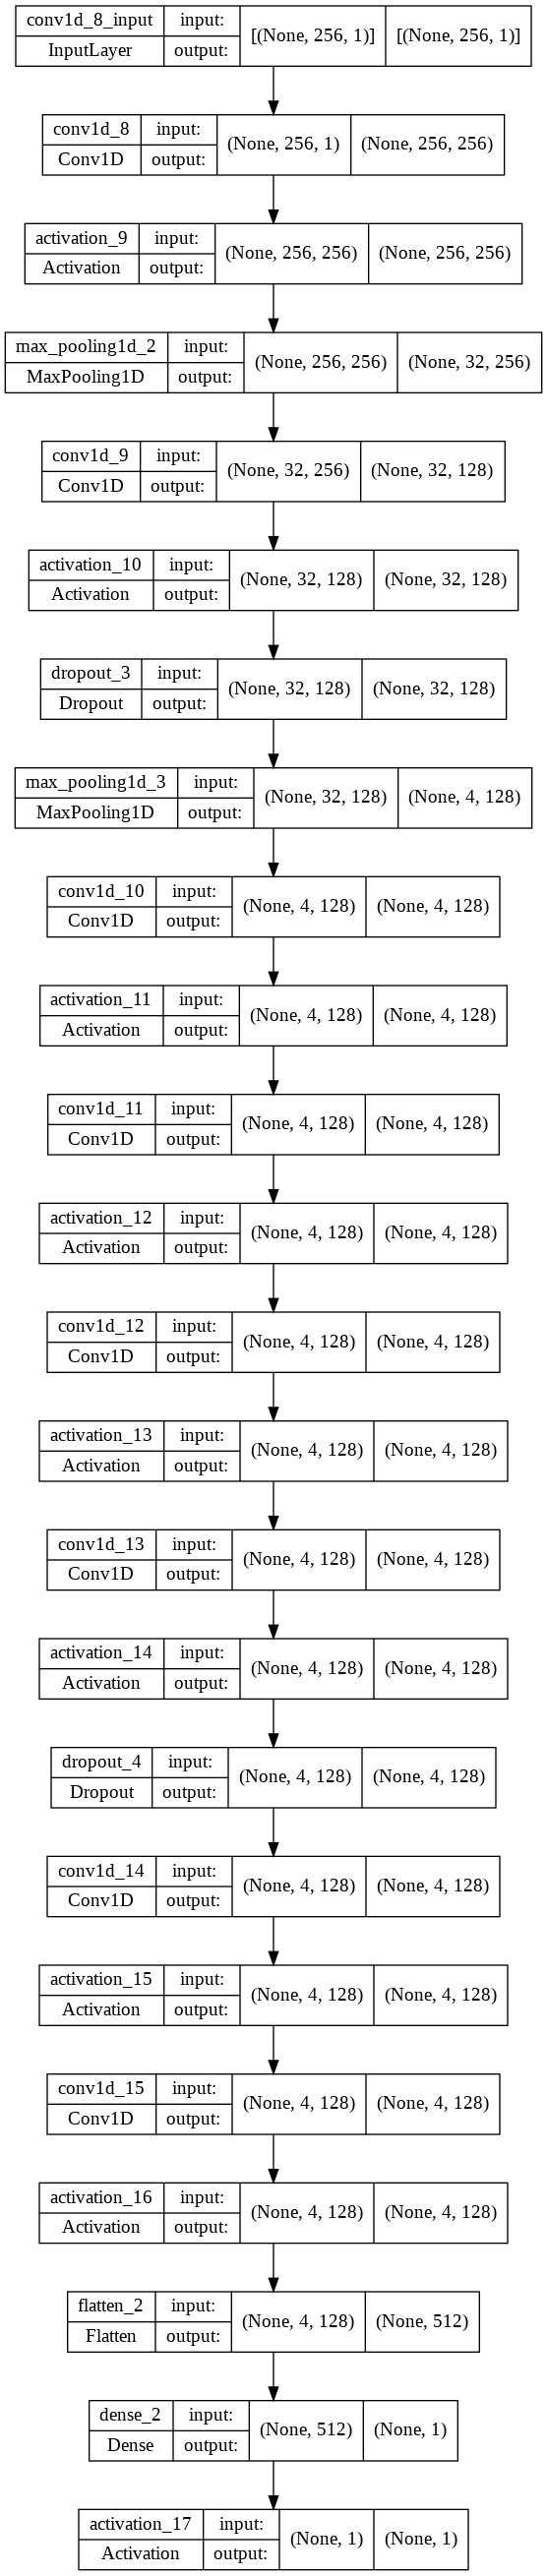

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(modeln, to_file='model.png', show_shapes=True)

In [47]:
modeln.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
cnnhistory=modeln.fit(padded_X,ycat_tr, batch_size=32, epochs=30, validation_split=0.15)

Epoch 1/30
460/460 [==============================] - 21s 44ms/step - loss: nan - accuracy: 0.1490 - val_loss: nan - val_accuracy: 0.1463
Epoch 2/30
460/460 [==============================] - 25s 53ms/step - loss: nan - accuracy: 0.1490 - val_loss: nan - val_accuracy: 0.1463
Epoch 3/30
460/460 [==============================] - 19s 41ms/step - loss: nan - accuracy: 0.1490 - val_loss: nan - val_accuracy: 0.1463
Epoch 4/30
460/460 [==============================] - 19s 40ms/step - loss: nan - accuracy: 0.1490 - val_loss: nan - val_accuracy: 0.1463
Epoch 5/30
460/460 [==============================] - 18s 39ms/step - loss: nan - accuracy: 0.1490 - val_loss: nan - val_accuracy: 0.1463
Epoch 6/30
460/460 [==============================] - 19s 42ms/step - loss: nan - accuracy: 0.1490 - val_loss: nan - val_accuracy: 0.1463
Epoch 7/30
460/460 [==============================] - 18s 40ms/step - loss: nan - accuracy: 0.1490 - val_loss: nan - val_accuracy: 0.1463
Epoch 8/30
460/460 [==============

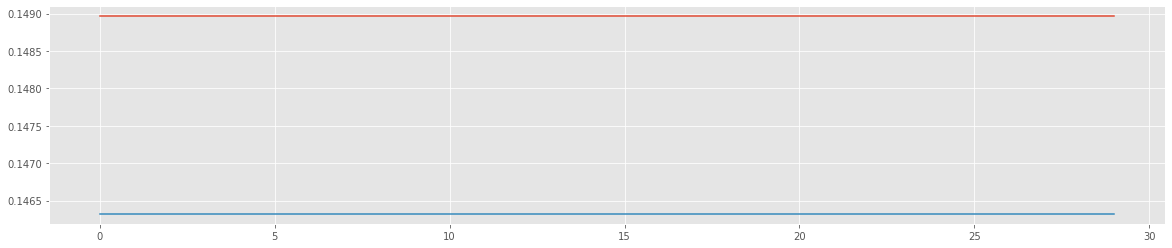

0.14896364510059357

In [48]:
import matplotlib.pyplot as plt
hist = pd.DataFrame(cnnhistory.history)
plt.style.use("ggplot")
plt.figure(figsize=(20,4))
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.show()

hist = pd.DataFrame(cnnhistory.history)

hist['accuracy'][1]

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
y_preds = model_word2vec.predict(padded_Xtest)
y_preds_te=np.argmax(y_preds,axis=-1)
target_names=['business','editorial','entertainment','nation','sports']
print(classification_report(test_df['target'], y_preds_te))
print(confusion_matrix(test_df['target'], y_preds_te))
y_preds.shape

              precision    recall  f1-score   support

           0       0.15      1.00      0.26       653
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00      1289
           3       0.00      0.00      0.00      1673
           4       0.00      0.00      0.00       437

    accuracy                           0.15      4329
   macro avg       0.03      0.20      0.05      4329
weighted avg       0.02      0.15      0.04      4329

[[ 653    0    0    0    0]
 [ 277    0    0    0    0]
 [1289    0    0    0    0]
 [1673    0    0    0    0]
 [ 437    0    0    0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(4329, 5)

In [51]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_df['target'], y_preds_te)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 15.08%


# New Section

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model= Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(256,1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#model.add(Dropout(0.2))
modeln.add(Flatten())
modeln.add(Dense(5))
modeln.add(Activation('softmax'))
opt= tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
lstmhistory=model.fit(padded_Xtest,ycat_te, batch_size=32, epochs=100, validation_split=0.15)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_preds = model_word2vec.predict(padded_Xtest)
y_preds_te=np.argmax(y_preds,axis=-1)
#target_names=['business','editorial','entertainment','nation','sports']
print(classification_report(test_df['target'], y_preds_te))
print(confusion_matrix(test_df['target'], y_preds_te))
y_preds.shape

# New Section MLP

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split

#Initialise Multi Layer Perceptron Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 500)

In [53]:
model.fit(padded_X,ycat_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [54]:
#Predict for the test set
y_pred = model.predict(padded_Xtest)
ycat_tr.shape

(17312, 1)

In [59]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
y_preds = model.predict(padded_Xtest)
y_preds_te=np.argmax(y_preds,axis=-1)
target_names=['business','editorial','entertainment','nation','sports']
print(classification_report(test_df['target'], y_preds))
print(confusion_matrix(test_df['target'], y_preds))


              precision    recall  f1-score   support

           0       0.17      0.10      0.13       653
           1       0.35      0.54      0.43       277
           2       0.33      0.41      0.37      1289
           3       0.41      0.39      0.40      1673
           4       0.13      0.09      0.11       437

    accuracy                           0.33      4329
   macro avg       0.28      0.31      0.29      4329
weighted avg       0.32      0.33      0.32      4329

[[ 67  41 250 251  44]
 [ 15 150  49  50  13]
 [101  83 534 485  86]
 [160 113 624 653 123]
 [ 47  36 141 173  40]]


In [60]:
#Calculate Accuracy
accuracy = accuracy_score(ycat_te, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 33.36%


# RNN

In [39]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
import numpy as np
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [45]:

kernel_size = 2
filters = 256
pool_size = 2
gru_node = 256
modelr = Sequential()
modelr.add(Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=256,
                            trainable=False))

modelr.add(Dropout(0.2))
modelr.add(Conv1D(filters, kernel_size, activation='relu'))
modelr.add(MaxPooling1D(pool_size=pool_size))
modelr.add(Conv1D(filters, kernel_size, activation='relu'))
modelr.add(MaxPooling1D(pool_size=pool_size))
modelr.add(Conv1D(filters, kernel_size, activation='relu'))
modelr.add(MaxPooling1D(pool_size=pool_size))
modelr.add(Conv1D(filters, kernel_size, activation='relu'))
modelr.add(MaxPooling1D(pool_size=pool_size))
modelr.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
modelr.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
modelr.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
modelr.add(LSTM(gru_node, recurrent_dropout=0.2))
modelr.add(Dense(1024,activation='relu'))
modelr.add(Dense(1))
modelr.add(Activation('softmax'))

modelr.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

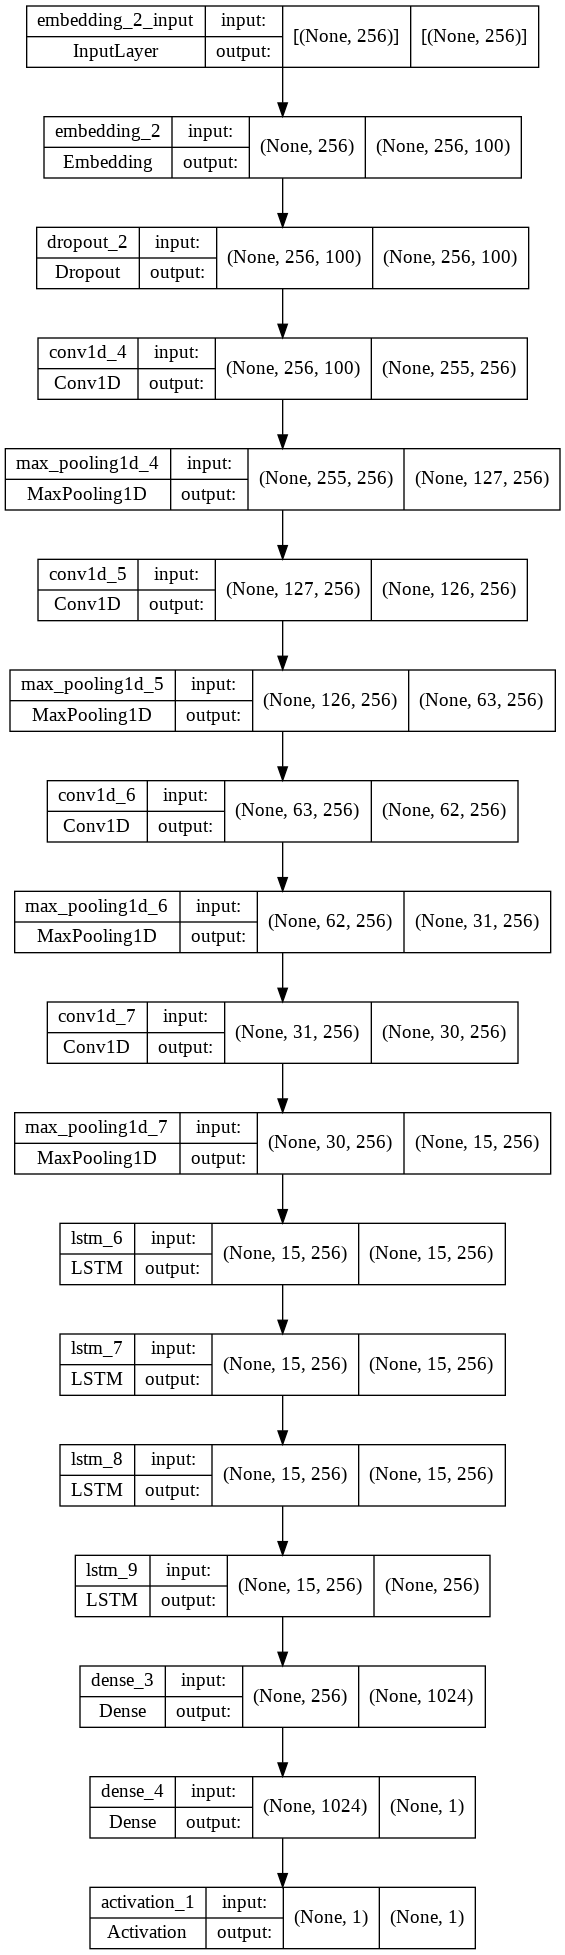

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(modelr, to_file='model.png', show_shapes=True)


In [47]:
modelr.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
cnnhistory=modelr.fit(padded_X,ycat_tr, batch_size=32, epochs=3, validation_split=0.15)

Epoch 1/3
460/460 [==============================] - 321s 677ms/step - loss: 0.0000e+00 - accuracy: 0.0603 - val_loss: 0.0000e+00 - val_accuracy: 0.0658
Epoch 2/3
460/460 [==============================] - 300s 652ms/step - loss: 0.0000e+00 - accuracy: 0.0603 - val_loss: 0.0000e+00 - val_accuracy: 0.0658
Epoch 3/3
460/460 [==============================] - 297s 647ms/step - loss: 0.0000e+00 - accuracy: 0.0603 - val_loss: 0.0000e+00 - val_accuracy: 0.0658


In [56]:
from sklearn.metrics import classification_report,confusion_matrix
y_preds = modelr.predict(padded_Xtest)
y_preds_r=np.argmax(y_preds,axis=-1)
target_names=['business','editorial','entertainment','nation','sports']
print(classification_report(test_df['target'], y_preds_r))
print(confusion_matrix(test_df['target'], y_preds_r))


              precision    recall  f1-score   support

           0       0.15      1.00      0.26       653
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00      1289
           3       0.00      0.00      0.00      1673
           4       0.00      0.00      0.00       437

    accuracy                           0.15      4329
   macro avg       0.03      0.20      0.05      4329
weighted avg       0.02      0.15      0.04      4329

[[ 653    0    0    0    0]
 [ 277    0    0    0    0]
 [1289    0    0    0    0]
 [1673    0    0    0    0]
 [ 437    0    0    0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#Calculate Accuracy
accuracy = accuracy_score(test_df['target'], y_preds_te)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 15.08%


# New LSTM

In [50]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [51]:

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=256,
                            trainable=False))

model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, recurrent_dropout=0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [53]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
lstmhistory=model.fit(padded_X,ycat_tr, batch_size=32, epochs=3, validation_split=0.15)

Epoch 1/3
460/460 [==============================] - 346s 711ms/step - loss: 0.0000e+00 - accuracy: 0.0603 - val_loss: 0.0000e+00 - val_accuracy: 0.0658
Epoch 2/3
460/460 [==============================] - 299s 651ms/step - loss: 0.0000e+00 - accuracy: 0.0603 - val_loss: 0.0000e+00 - val_accuracy: 0.0658
Epoch 3/3
460/460 [==============================] - 298s 648ms/step - loss: 0.0000e+00 - accuracy: 0.0603 - val_loss: 0.0000e+00 - val_accuracy: 0.0658


In [55]:
from sklearn.metrics import classification_report,confusion_matrix
y_preds = model.predict(padded_Xtest)
y_preds_te=np.argmax(y_preds,axis=-1)
target_names=['business','editorial','entertainment','nation','sports']
print(classification_report(test_df['target'], y_preds_te))
print(confusion_matrix(test_df['target'], y_preds_te))
y_preds.shape

              precision    recall  f1-score   support

           0       0.15      1.00      0.26       653
           1       0.00      0.00      0.00       277
           2       0.00      0.00      0.00      1289
           3       0.00      0.00      0.00      1673
           4       0.00      0.00      0.00       437

    accuracy                           0.15      4329
   macro avg       0.03      0.20      0.05      4329
weighted avg       0.02      0.15      0.04      4329

[[ 653    0    0    0    0]
 [ 277    0    0    0    0]
 [1289    0    0    0    0]
 [1673    0    0    0    0]
 [ 437    0    0    0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(4329, 1)

In [57]:
#Calculate Accuracy
accuracy = accuracy_score(test_df['target'], y_preds_te)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 15.08%


In [58]:
df="న్యూఢిల్లీ ఆప్ సీనియర్ నేత కుమార్ విశ్వాస్‌తో తనకు భేదాభిప్రాయాలు ఉన్నట్లు జరుగుతున్న ప్రచారాన్ని.విపక్ష ఎమ్మెల్యేలతో గవర్నర్‌విశ్వాస పరీక్షకు నో చెన్నై(ఆంధ్రజ్యోతి): తమిళనాట పళని స్వామి ప్రభుత్వాన."
de=clean_telugu_text_vocab(df)
tra=tokenizer.texts_to_sequences(de)
padd=pad_sequences(list(tra),maxlen=256)

In [ ]:
y_preds = model_word2vec.predict(padd)
y_preds


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(10, 6))

# set height of bar
a = [0.62,0.83,0.71]
p=[0.61,0.83,0.70]
r=[0.63,0.82,0.68]
f1=[0.59,0.81,0.69]

# Set position of bar on X axis
br1 = np.arange(len(a))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, a, color ='r', width = barWidth,
		edgecolor ='grey', label ='Accuracy')
plt.bar(br2, p, color ='g', width = barWidth,
		edgecolor ='grey', label ='Precision')
plt.bar(br3,r, color ='b', width = barWidth,
		edgecolor ='grey', label ='Recall')
plt.bar(br4,f1, color ='y', width = barWidth,
		edgecolor ='grey', label ='F1 Score')

# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(a))],
		['MLP','CNN','LSTM','BILSTM','RNN'])

plt.legend()
plt.show()
